# 1. 파일 읽어들이기 및 전처리

In [1]:
# 형태소 분석
from konlpy.tag import Mecab

# 불용어 지정
def get_stopWords():
    # 불용어 파일 경로 확인-------------------------------------------------------------------------------------------------------------------
    stop_words = open("/home/joe/amr_ws/eda/data/koreanStopwords.txt", "r")
    lines = stop_words.readlines()
    stop_word = []
    for line in lines:
        line = line.replace("\n", "")
        stop_word.append(line)
    stop_words.close()
    return stop_word

# mecab 모듈을 이용 형태소로 분리 후 형태소가 한 글자이거나 불용어 리스트에 해당된다면 삭제
def get_tokenized_article(refined_article):
    stop_words = get_stopWords()
    m = Mecab()
    tokenized = []

    for row in refined_article:
        inner = []
        row = str(row)
        text = m.morphs(row)
        
        for word in text:
            
            if (len(word) == 1) or (word in stop_words):
                pass
            else:
                inner.append(word)

        tokenized.append(inner)
    
    return tokenized

# 형태소 분리한 제목과 기사내용 열을 새롭게 추가
import pandas as pd
df=pd.read_csv("../../data/eda_project/rainbow/2023_rainbow_predicted.csv", sep = ",")

df["tokenized_text"] = get_tokenized_article(df["text"])
df["tokenized_title"] = get_tokenized_article(df["title"])

# 데이터 형태에 따라 특정열 삭제
# df.drop(["Unnamed: 0"], axis = 1,inplace=True)

df



,date,title,text,prediction,score,tokenized_text,tokenized_title
0,2023-01-01 07:04:01,그래도 돈 벌 주식은 있다 PB들이 꼭 찍은 유망업종은 2023 증시전망,['올해 초까지 주식시장 바닥 다지기 지속 전망 정책테마주부터 AI관련주까지 빛보는...,악재,0.418525,"[주식, 바닥, 다지기, 지속, 정책, 테마주, AI, 업종, 게티, 이미지, 뱅크...","[주식, PB, 유망, 업종, 증시]"
1,2023-01-03 07:56:40,레인보우로보틱스 삼성전자 대상 590억 규모 유상증자 결정,['서울 뉴시스 김경택 기자 레인보우로보틱스는 운영자금과 시설자금 조달을 위해 삼성...,중립,1.000000,"[뉴시스, 김경택, 레인보우, 자금, 시설, 자금, 조달, 삼성전자, 대상, 590...","[레인보우, 삼성전자, 대상, 590, 규모, 유상, 증자, 결정]"
2,2023-01-03 08:22:01,레인보우로보틱스 590억 규모 제3자배정 유상증자 결정,['헤럴드경제 증권부 레인보우로보틱스는 시설자금 및 운영자금 조달을 위해 삼성전자를...,중립,1.000000,"[헤럴드, 경제, 증권, 레인보우, 시설, 자금, 자금, 조달, 삼성전자, 대상, ...","[레인보우, 590, 규모, 배정, 유상, 증자, 결정]"
3,2023-01-03 08:42:01,레인보우로보틱스 삼성전자에 589억원 유상증자 결정,"['사족보행을 연구하는 연구원들의 모습.', '레인보우로보틱스 제공 레인보우로보틱스...",중립,0.621262,"[사족, 보행, 연구원, 모습, 레인보우, 레인보우, 시설, 자금, 자금, 조달, ...","[레인보우, 삼성전자, 589, 유상, 증자, 결정]"
4,2023-01-03 09:08:02,특징주 레인보우로보틱스 삼성전자 대상 유상증자 결정 소식에 15 급등,['레인보우로보틱스가 삼성전자에 약 589억원 규모의 유상증자를 결정했다는 소식에 ...,중립,0.556152,"[레인보우, 스가, 삼성전자, 589, 규모, 유상, 증자, 결정, 소식, 급등세,...","[특징, 레인보우, 삼성전자, 대상, 유상, 증자, 결정, 소식, 급등]"
...,...,...,...,...,...,...,...
1447,2023-12-28 09:53:57,증시 폐장일 코스피 장 초반 0 12 상승 2616 60선 개장시황,['올해 마지막 거래일인 28일 오전 서울 중구 하나은행 명동점 딜링룸에 개장 시황...,중립,0.480395,"[마지막, 거래일, 28, 오전, 중구, 은행, 명동, 딜링, 개장, 시황, 표시,...","[증시, 폐장, 코스피, 초반, 2616, 60, 개장, 시황]"
1448,2023-12-28 16:27:17,유종의 미 아듀 2023 증시 올해 코스피19 코스닥 28 뛰었다 시황종합,"['코스피 1.', '6 오른 2655.', '28 코스닥 0.', '79 상승한 ...",중립,0.469149,"[코스피, 2655, 28, 코스닥, 79, 866, 57, 마감, News, 혜림...","[유종, 증시, 코스피, 19, 코스닥, 28, 시황, 종합]"
1449,2023-12-29 15:52:01,올해 반도체 AI에 투자자 관심 폭발 종목은 에코프로 1위,['올해 투자자들 많이 본 보고서 10개중 7개는 반도체 투자전략 사진 게티이미지뱅...,중립,0.536487,"[투자자, 많이, 보고서, 반도체, 전략, 게티, 이미지, 뱅크, 투자자, 가장, ...","[반도체, AI, 투자자, 관심, 폭발, 에코, 프로]"
1450,2023-12-29 17:57:03,AI 열풍 빅테크 ETF 올 순자산 2 4조 쑥,['국내 상장 14종 총액 7조 돌파 로봇ETF도 10배 급증 3861억 내년 금리...,호재,0.839396,"[총액, 돌파, 로봇, ETF, 급증, 3861, 금리, 인하, 성장, 열풍, 지속...","[AI, 열풍, 테크, ETF, 자산]"


In [2]:
# mecab 없는 경우
# 형태소 분리 후 저장된 파일을 이용하여 분석할 경우
# import pandas as pd
# df = pd.read_csv("../../data/eda_project/rainbow/2023_rainbow_predicted.csv", sep = ",")
# df1 = pd.read_csv("../../data/eda_project/tokenized_robot_2023.csv", sep = ",")
# df["tokenized_text"] = df1["tokenized_text"]
# df["tokenized_title"] = df1["tokenized_title"]
# df["tokenized_text"] = df["tokenized_text"].apply(lambda x: x.replace("[", ''))
# df["tokenized_text"] = df["tokenized_text"].apply(lambda x: x.replace("]", ''))
# df["tokenized_text"] = df["tokenized_text"].apply(lambda x: x.replace("'", ''))
# df["tokenized_text"] = df["tokenized_text"].apply(lambda x: x.split(", "))
# df.iloc[0]["tokenized_text"]


In [3]:
# 호재, 악재에 대해서 중립은 0, 악재는 -1을 곱해줘 스코어 판독
df.loc[df["prediction"]=="중립", "score"] = 0
df.loc[(df["prediction"]=="악재"), "score"] = df.loc[(df["prediction"]=="악재"), "score"] * (-1)

# datetime으로 변환
df["date"] = pd.to_datetime(df["date"])

# 새로운 열을 만들어 일(day), 월(month) 단위로 쪼갬
df["date_day"] = df["date"].dt.date
df["date_month"] = df["date"].dt.to_period("M")

df

,date,title,text,prediction,score,tokenized_text,tokenized_title,date_day,date_month
0,2023-01-01 07:04:01,그래도 돈 벌 주식은 있다 PB들이 꼭 찍은 유망업종은 2023 증시전망,['올해 초까지 주식시장 바닥 다지기 지속 전망 정책테마주부터 AI관련주까지 빛보는...,악재,-0.418525,"[주식, 바닥, 다지기, 지속, 정책, 테마주, AI, 업종, 게티, 이미지, 뱅크...","[주식, PB, 유망, 업종, 증시]",2023-01-01,2023-01
1,2023-01-03 07:56:40,레인보우로보틱스 삼성전자 대상 590억 규모 유상증자 결정,['서울 뉴시스 김경택 기자 레인보우로보틱스는 운영자금과 시설자금 조달을 위해 삼성...,중립,0.000000,"[뉴시스, 김경택, 레인보우, 자금, 시설, 자금, 조달, 삼성전자, 대상, 590...","[레인보우, 삼성전자, 대상, 590, 규모, 유상, 증자, 결정]",2023-01-03,2023-01
2,2023-01-03 08:22:01,레인보우로보틱스 590억 규모 제3자배정 유상증자 결정,['헤럴드경제 증권부 레인보우로보틱스는 시설자금 및 운영자금 조달을 위해 삼성전자를...,중립,0.000000,"[헤럴드, 경제, 증권, 레인보우, 시설, 자금, 자금, 조달, 삼성전자, 대상, ...","[레인보우, 590, 규모, 배정, 유상, 증자, 결정]",2023-01-03,2023-01
3,2023-01-03 08:42:01,레인보우로보틱스 삼성전자에 589억원 유상증자 결정,"['사족보행을 연구하는 연구원들의 모습.', '레인보우로보틱스 제공 레인보우로보틱스...",중립,0.000000,"[사족, 보행, 연구원, 모습, 레인보우, 레인보우, 시설, 자금, 자금, 조달, ...","[레인보우, 삼성전자, 589, 유상, 증자, 결정]",2023-01-03,2023-01
4,2023-01-03 09:08:02,특징주 레인보우로보틱스 삼성전자 대상 유상증자 결정 소식에 15 급등,['레인보우로보틱스가 삼성전자에 약 589억원 규모의 유상증자를 결정했다는 소식에 ...,중립,0.000000,"[레인보우, 스가, 삼성전자, 589, 규모, 유상, 증자, 결정, 소식, 급등세,...","[특징, 레인보우, 삼성전자, 대상, 유상, 증자, 결정, 소식, 급등]",2023-01-03,2023-01
...,...,...,...,...,...,...,...,...,...
1447,2023-12-28 09:53:57,증시 폐장일 코스피 장 초반 0 12 상승 2616 60선 개장시황,['올해 마지막 거래일인 28일 오전 서울 중구 하나은행 명동점 딜링룸에 개장 시황...,중립,0.000000,"[마지막, 거래일, 28, 오전, 중구, 은행, 명동, 딜링, 개장, 시황, 표시,...","[증시, 폐장, 코스피, 초반, 2616, 60, 개장, 시황]",2023-12-28,2023-12
1448,2023-12-28 16:27:17,유종의 미 아듀 2023 증시 올해 코스피19 코스닥 28 뛰었다 시황종합,"['코스피 1.', '6 오른 2655.', '28 코스닥 0.', '79 상승한 ...",중립,0.000000,"[코스피, 2655, 28, 코스닥, 79, 866, 57, 마감, News, 혜림...","[유종, 증시, 코스피, 19, 코스닥, 28, 시황, 종합]",2023-12-28,2023-12
1449,2023-12-29 15:52:01,올해 반도체 AI에 투자자 관심 폭발 종목은 에코프로 1위,['올해 투자자들 많이 본 보고서 10개중 7개는 반도체 투자전략 사진 게티이미지뱅...,중립,0.000000,"[투자자, 많이, 보고서, 반도체, 전략, 게티, 이미지, 뱅크, 투자자, 가장, ...","[반도체, AI, 투자자, 관심, 폭발, 에코, 프로]",2023-12-29,2023-12
1450,2023-12-29 17:57:03,AI 열풍 빅테크 ETF 올 순자산 2 4조 쑥,['국내 상장 14종 총액 7조 돌파 로봇ETF도 10배 급증 3861억 내년 금리...,호재,0.839396,"[총액, 돌파, 로봇, ETF, 급증, 3861, 금리, 인하, 성장, 열풍, 지속...","[AI, 열풍, 테크, ETF, 자산]",2023-12-29,2023-12


# 2. 월별 기사 갯수 및 호재, 악재 추이
---

In [4]:
# mysql 이용
import mysql.connector
from tqdm.notebook import tqdm
conn = mysql.connector.connect(
    host = "database-1.cvsau8siiw7o.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "admin",
    password = "amrbase1",
    database = "amrbase"
)
cur = conn.cursor(buffered= True)
sql = "SELECT MONTH(date) month, count(*) as count \
FROM predicted_rainbow \
WHERE title LIKE '%레인보우%로보틱스%' \
   OR detail LIKE '%레인보우%로보틱스%' \
GROUP BY MONTH(date) \
order by month"
cur.execute(sql)
result = cur.fetchall()
monthly_article = pd.DataFrame(result, columns= ["월", "뉴스수"])
monthly_article

,월,뉴스수
0,1,142
1,2,77
2,3,173
3,4,137
4,5,112
5,6,77
6,7,44
7,8,87
8,9,167
9,10,131


/tmp/ipykernel_15627/2669736600.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = monthly_article["월"], y = monthly_article["뉴스수"], palette="YlGnBu")


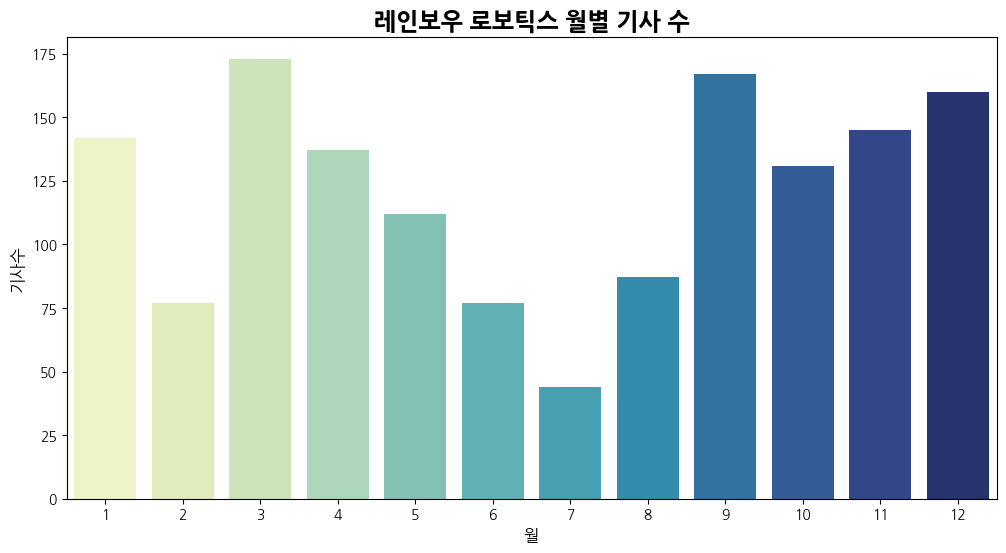

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

plt.figure(figsize=(12, 6))
sns.barplot(x = monthly_article["월"], y = monthly_article["뉴스수"], palette="YlGnBu")
plt.title("레인보우 로보틱스 월별 기사 수", fontsize = 17, weight = "bold")
plt.xlabel("월", fontsize = 12)
plt.ylabel("기사수", fontsize = 12)
plt.show()

In [6]:
sql = "SELECT MONTH(date) month, sum(score) as sum \
FROM predicted_rainbow \
WHERE title LIKE '%레인보우%로보틱스%' \
   OR detail LIKE '%레인보우%로보틱스%' \
GROUP BY MONTH(date) \
order by month"
cur.execute(sql)
result = cur.fetchall()
monthly_score = pd.DataFrame(result, columns= ["월", "감성점수"])
monthly_score

,월,감성점수
0,1,744.128821
1,2,400.788613
2,3,925.772706
3,4,672.639780
4,5,538.805781
5,6,371.663243
6,7,231.000583
7,8,447.477693
8,9,863.661504
9,10,664.317990


/tmp/ipykernel_15627/1038988194.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = monthly_score["월"], y = monthly_score["감성점수"], palette="RdYlGn")


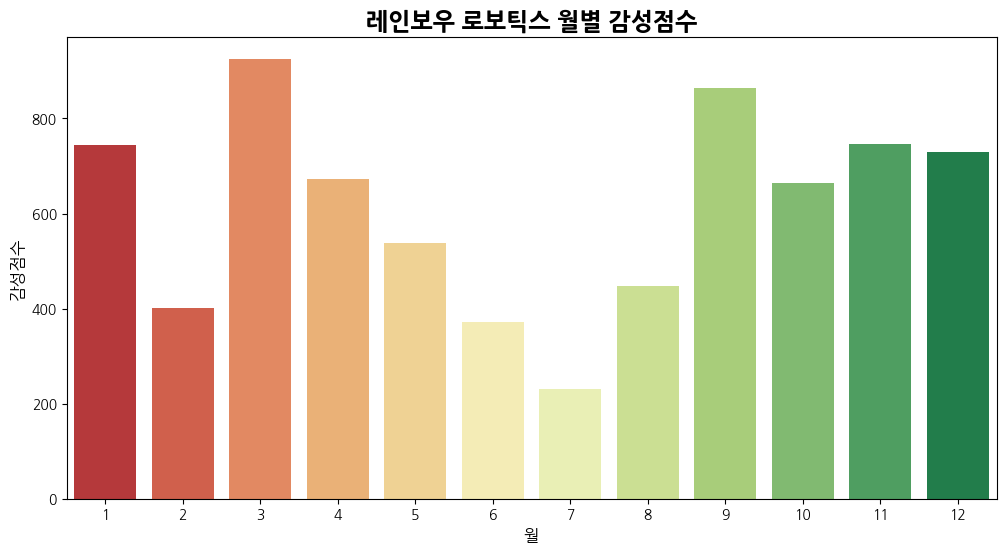

In [7]:
plt.figure(figsize=(12, 6))
sns.barplot(x = monthly_score["월"], y = monthly_score["감성점수"], palette="RdYlGn")
plt.title("레인보우 로보틱스 월별 감성점수", fontsize = 17, weight = "bold")
plt.xlabel("월", fontsize = 12)
plt.ylabel("감성점수", fontsize = 12)
plt.show()

## 2023년 레인보우로보틱스의 키워드를 뽑기 위한 워드 클라우드 시각화
### 2023 전체, 월별 키워드 추출

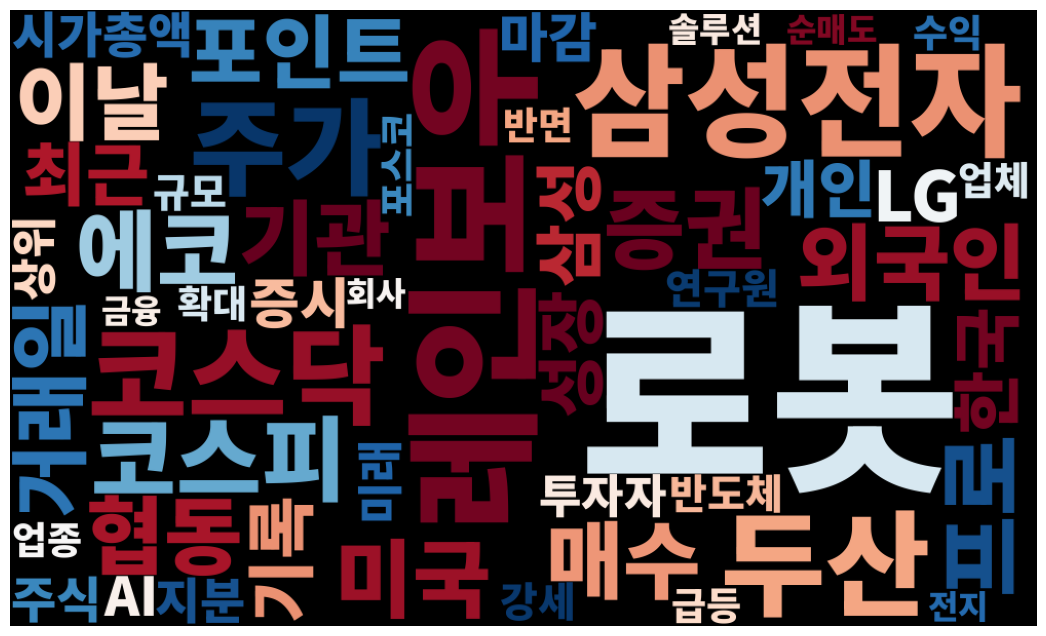

In [8]:
from collections import Counter
from wordcloud import WordCloud
from PIL import Image
import numpy as np



# 전체 키워드 추출 후 리스트에 리스트 형태로 저장
total_keyward = []
monthly_keyward = []
for  i, b in df.iterrows():
    total_keyward.extend(b["tokenized_text"])
counts = Counter(total_keyward)
tags = counts.most_common(50)


# 월 별로 키워드 추출 후 리스트에 리스트 형태로 저장    
month_list = df["date_month"].unique()


for month in month_list:
    inner = []
    monthly_data = df.loc[df["date_month"]==month]
    
    for i, row in monthly_data.iterrows():
        inner.extend(row["tokenized_text"])
        
    count = Counter(inner)
    monthly_keyward.append(count.most_common())



# 전체 키워드에 대해 워드 클라우드 그래프 그리기
wc = WordCloud(font_path = "/home/joe/amr_ws/eda/document/Noto_Sans_KR/static/NotoSansKR-Black.ttf",
               background_color = "black",
               height = 600,
               width = 1000,
               colormap = 'RdBu'
               )

cloud = wc.generate_from_frequencies(dict(tags))

cloud.to_file("robot_keyward.jpg")

plt.figure(figsize=(15,8))
plt.axis("off")
plt.imshow(cloud)
plt.show()

## 레인보우 2023년 가장 많이 언급된 키워드 Top 10

/tmp/ipykernel_15627/2055140914.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keyward_news, y=keyward_list, orient="h", palette="Blues_r")


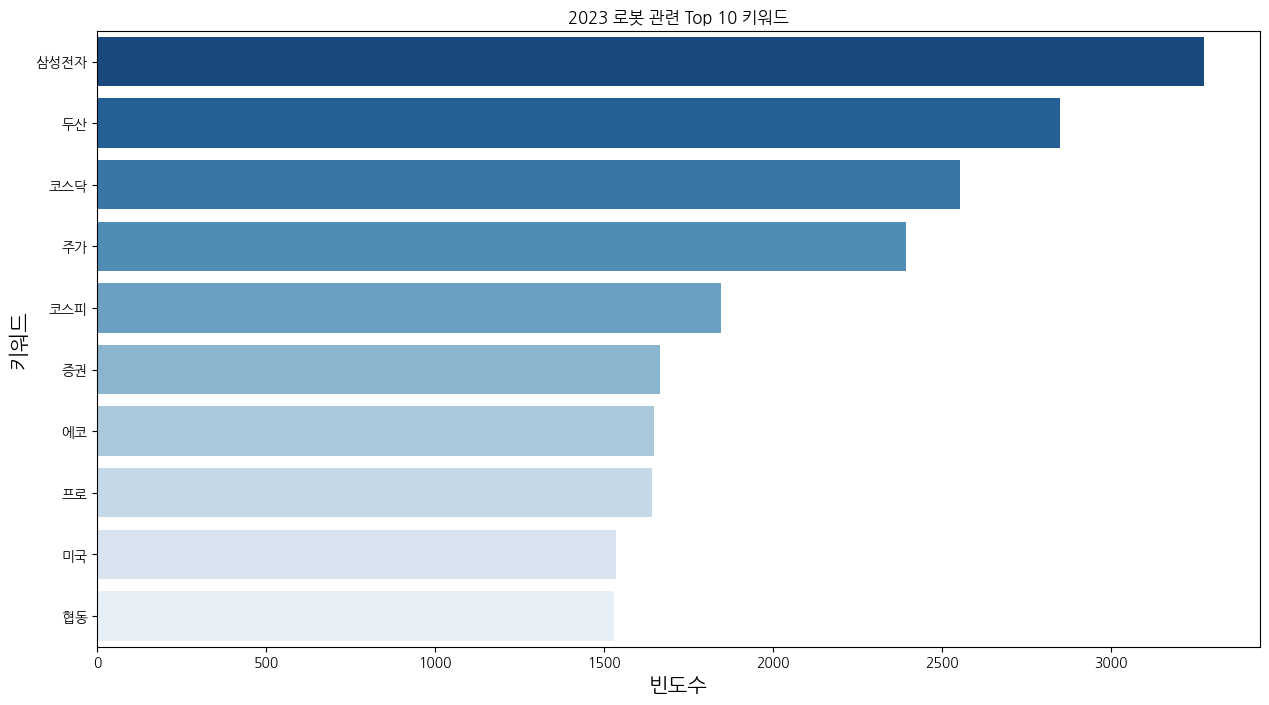

In [36]:
keyward_list = []
keyward_news = []
# 로봇으로 뉴스 검색을 했기 때문에 로봇이 가장 많이 나와서 첫 번째는 제외
for tag in tags[2:12]:
    keyward_list.append(tag[0])
    keyward_news.append(tag[1])
top_10 = pd.DataFrame(data = keyward_news, index = keyward_list, columns=["number"])


plt.figure(figsize=(15, 8))
sns.barplot(x=keyward_news, y=keyward_list, orient="h", palette="Blues_r")
plt.title("2023 로봇 관련 Top 10 키워드")
plt.xlabel("빈도수", fontsize = 15)
plt.ylabel("키워드", fontsize = 15)
plt.show()

## 월별 키워드 분포

/tmp/ipykernel_15627/3138608717.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yy[i-1], y=xx[i-1], orient="h", ax=ax, palette="Blues_r")
/tmp/ipykernel_15627/3138608717.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yy[i-1], y=xx[i-1], orient="h", ax=ax, palette="Blues_r")
/tmp/ipykernel_15627/3138608717.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yy[i-1], y=xx[i-1], orient="h", ax=ax, palette="Blues_r")
/tmp/ipykernel_15627/3138608717.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and 

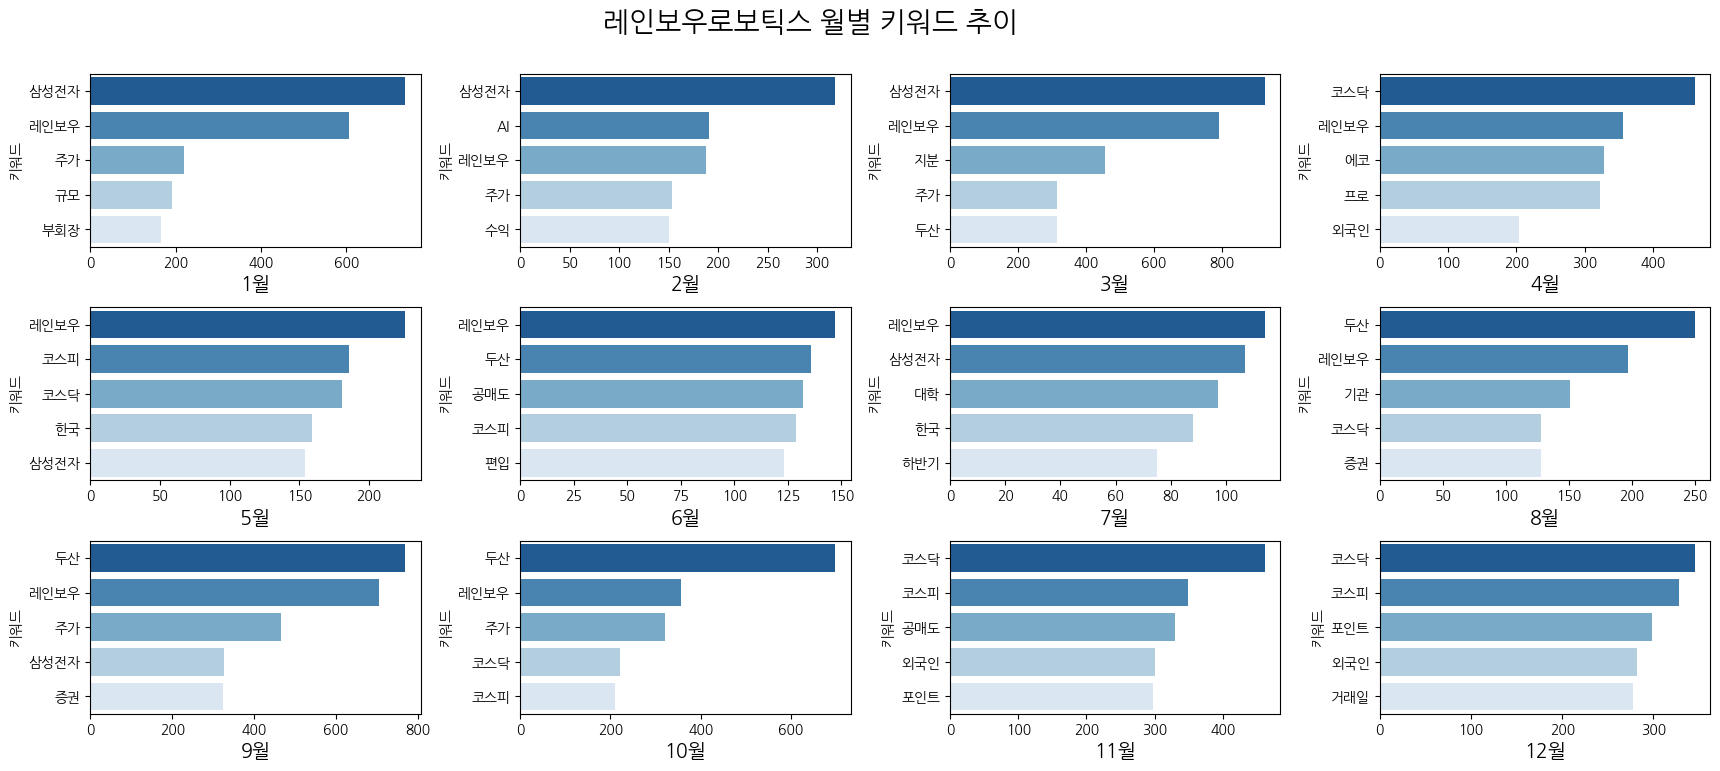

In [10]:
def draw_topic():
    # 3행 4열의 subplot 생성
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 8))
    plt.subplots_adjust(left=0.1, bottom=0.1,  right=1, top=0.9, wspace=0.3, hspace=0.35)
   
    # subplot에 데이터 플롯
    for i, ax in enumerate(axes.flatten(), start=1):
        sns.barplot(x=yy[i-1], y=xx[i-1], orient="h", ax=ax, palette="Blues_r")
        ax.set_ylabel("키워드")
        ax.set_xlabel(f'{i}월', fontdict={"size": 14})

    fig.suptitle('레인보우로보틱스 월별 키워드 추이', fontsize=20)
    plt.show()


xx = []
yy = []
for month in range(12):
    x = []
    y = []
    
    
    # 가장 많이 나오는 키워드가 로봇이기 때문에 이를 제외한 나머지 키워드를 찾아줌
    for i in range(1, 6):
        x.append(monthly_keyward[month][i][0])
        y.append(monthly_keyward[month][i][1])
    xx.append(x)
    yy.append(y)
        
import matplotlib.pyplot as plt
import seaborn as sns
# import koreanize_matplotlib

draw_topic()


In [11]:
len(monthly_keyward)

12

## 히트맵 활용한 분포 확인

In [12]:
monthly_topic = pd.DataFrame()
for i, month in enumerate(monthly_keyward):
    keyward = []
    number = []
    for j in range(1, 6):
        keyward.append(month[j][0])
        number.append(month[j][1])
        monthly_df = pd.DataFrame(data = number, index = keyward, columns=[f"{i+1}월"])
      
    monthly_topic = pd.concat([monthly_topic, monthly_df], axis=1, join='outer')
    
monthly_topic    

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
삼성전자,738.0,318.0,925.0,NaN,154.0,NaN,107.0,NaN,327.0,NaN,NaN,NaN
레인보우,607.0,188.0,790.0,356.0,226.0,147.0,114.0,197.0,706.0,356.0,NaN,NaN
주가,220.0,153.0,316.0,NaN,NaN,NaN,NaN,NaN,466.0,321.0,NaN,NaN
규모,192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
부회장,166.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AI,NaN,191.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
수익,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
지분,NaN,NaN,455.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
두산,NaN,NaN,314.0,NaN,NaN,136.0,NaN,250.0,769.0,697.0,NaN,NaN
코스닥,NaN,NaN,NaN,461.0,181.0,NaN,NaN,128.0,NaN,221.0,461.0,345.0


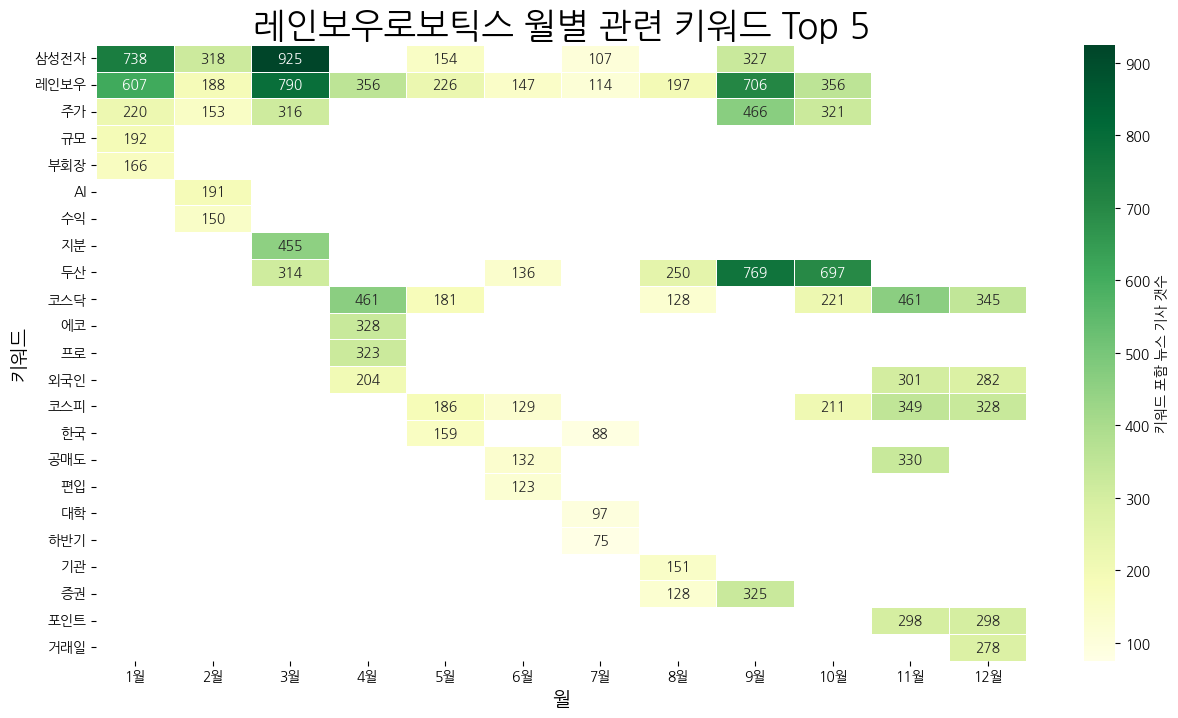

In [13]:
import seaborn as sns
import koreanize_matplotlib

plt.figure(figsize=(15, 8))
sns.heatmap(monthly_topic, cmap = "YlGn", annot = True, linewidths=.5,fmt = ".0f", cbar_kws = {"label":"키워드 포함 뉴스 기사 갯수"})
plt.title("레인보우로보틱스 월별 관련 키워드 Top 5", fontsize = 25)
plt.xlabel("월", fontsize = 14)
plt.ylabel("키워드", fontsize = 14)
plt.show()

## 가장 많이 언급된 상위 5개 키워드 리스트 생성

In [14]:
# 다음의 키워드 중 비슷한 분야는 제외하고 각자 독립적인 키워드를 선별

plt.close()
tags
keyward_list = []
keyward_news = []

# 로봇으로 뉴스 검색을 했기 때문에 로봇이 가장 많이 나와서 첫 번째는 제외
for tag in tags[1:6]:
    keyward_list.append(tag[0])
    keyward_news.append(tag[1])
top_10 = pd.DataFrame(data = keyward_news, index = keyward_list, columns=["number"])
top_10

,number
레인보우,4200
삼성전자,3277
두산,2849
코스닥,2553
주가,2395


/tmp/ipykernel_15627/199541532.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keyward_news, y=keyward_list, orient="h", palette="muted")


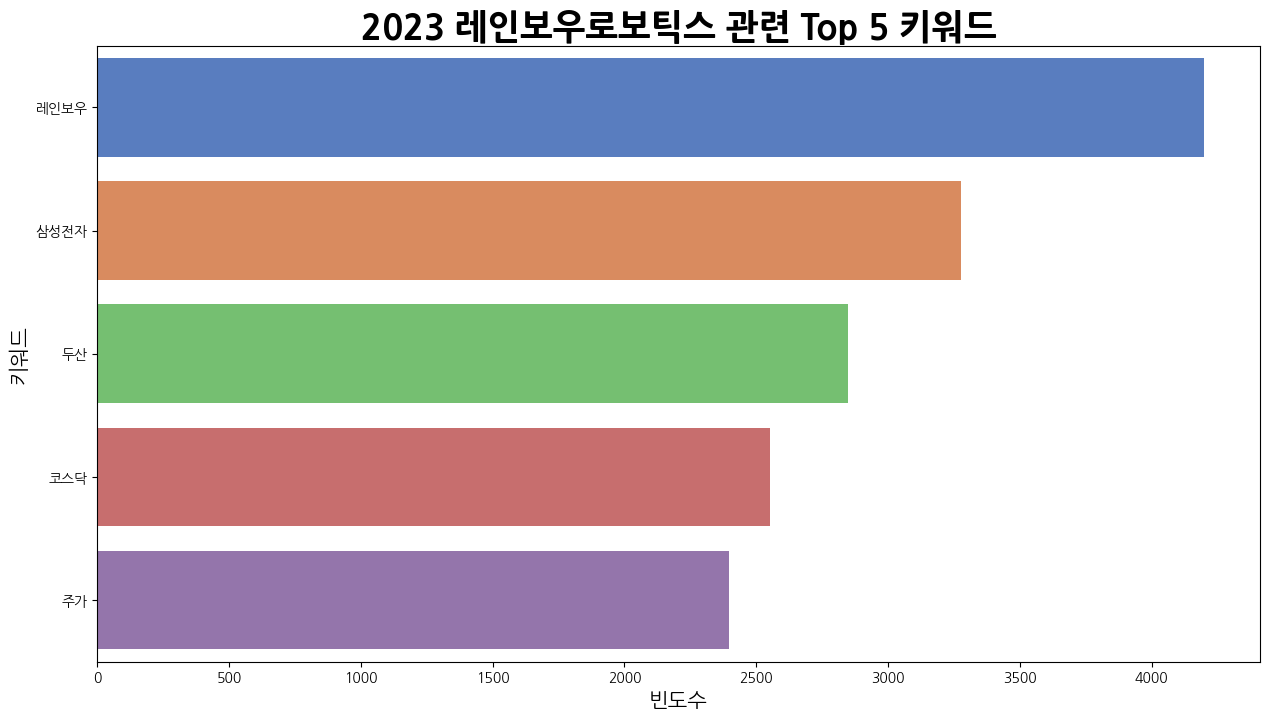

In [15]:
plt.figure(figsize=(15, 8))
sns.barplot(x=keyward_news, y=keyward_list, orient="h", palette="muted")
plt.title("2023 레인보우로보틱스 관련 Top 5 키워드", fontsize = 25, weight = "bold")
plt.xlabel("빈도수", fontsize = 15)
plt.ylabel("키워드", fontsize = 15)
plt.show()

## 선정한 5개의 키워드가 각각 포함되어 있는 기사를 키워드 별로 분류(5개)

In [16]:
topic_index = []
for keyward in keyward_list:
    inner = []
    for idx, article in enumerate(df["tokenized_text"]):
        if keyward in article:
            inner.append(True)
        else:
            inner.append(False)
    topic_index.append(inner)
    
topic_distinct_list = []
for i, keyward in enumerate(keyward_list):
    topic_distinct_list.append(df.loc[topic_index[i]])
len(topic_distinct_list)

5

In [17]:
topic_distinct_list[2]

,date,title,text,prediction,score,tokenized_text,tokenized_title,date_day,date_month
11,2023-01-03 10:25:01,삼성전자 레인보우로보틱스에 590억 투자 로봇 파트너사로 낙점,"['제3자 배정 유상증자 방식으로 지분 10.', '3 확보 삼성전자의 국내 상장사...",중립,0.000000,"[배정, 유상, 증자, 방식, 지분, 확보, 삼성전자, 지분, 로봇, 협동, 로봇,...","[삼성전자, 레인보우, 590, 로봇, 파트너, 낙점]",2023-01-03,2023-01
14,2023-01-03 11:19:01,주식 초고수는 지금 레인보우로보틱스 매수 1위 등극 삼전 파트너사 기대감 솔솔,['미래에셋증권 엠클럽 집계 POSCO홀딩스 현대두산인프라코어 금양에도 매수 집중 ...,호재,0.572853,"[미래, 증권, 클럽, 집계, POSCO, 홀딩스, 현대, 두산, 인프라, 코어, ...","[주식, 고수, 레인보우, 매수, 등극, 삼전, 파트너, 기대감, 솔솔]",2023-01-03,2023-01
40,2023-01-04 16:40:01,CES 2023 로봇 업계 첨단 자율주행 센서 카메라 주목,['레벨4 자율주행 기술 3D 카메라 기술 선봬 현대차 두산은 불참 로봇 업계가 5...,중립,0.000000,"[레벨, 자율, 주행, 카메라, 현대차, 두산, 불참, 로봇, 업계, 현지, 미국,...","[CES, 로봇, 업계, 첨단, 자율, 주행, 센서, 카메라, 주목]",2023-01-04,2023-01
66,2023-01-06 15:44:01,데이터로 보는 증시 에코프로비엠 엘앤에프 기관 외국인 코스닥 순매수 1위 1월 6일,['서울경제 기관 외국인 순매수 주요 종목 에코프로비엠 247540 엘앤에프 066...,중립,0.000000,"[경제, 기관, 외국인, 매수, 주요, 에코, 프로, 비엠, 247540, 에프, ...","[데이터, 증시, 에코, 프로, 비엠, 에프, 기관, 외국인, 코스닥, 매수]",2023-01-06,2023-01
68,2023-01-07 07:02:01,로봇에서 길을 찾는 기업들 현대차 테슬라의 로봇 굴기,['삼성 레인보우로보틱스에 589억원 유상증자 투자로 2대 주주 현대차 미국 로봇 ...,호재,0.518417,"[삼성, 레인보우, 589, 유상, 증자, 주주, 현대차, 미국, 로봇, 전문, 보...","[로봇, 현대차, 테슬라, 로봇, 굴기]",2023-01-07,2023-01
...,...,...,...,...,...,...,...,...,...
1426,2023-12-19 04:09:13,스스로 학습해 인간과 소통 뜨거워지는 AI 로봇 두뇌 싸움,['테슬라 옵티머스 곧 수백만대 양산 현대차 싱가포르 센터 로봇개 활용 LIG넥스원...,호재,0.573185,"[테슬라, 옵티머스, 수백만, 양산, 현대차, 싱가포르, 로봇, LIG, 넥스, 로...","[스스로, 학습, 인간, 소통, 뜨거워지, AI, 로봇, 두뇌, 싸움]",2023-12-19,2023-12
1430,2023-12-20 16:03:01,치킨은 로봇이 튀겨야 제맛 두산 이어 LG도 가세,['로봇 식음료 업계 협력 확대 식음료 업계에서 수년 전부터 로봇을 활용해 튀김 과...,중립,0.000000,"[로봇, 식음료, 업계, 협력, 확대, 식음료, 업계, 수년, 로봇, 튀김, 과정,...","[치킨, 로봇, 튀겨야, 두산, LG, 가세]",2023-12-20,2023-12
1449,2023-12-29 15:52:01,올해 반도체 AI에 투자자 관심 폭발 종목은 에코프로 1위,['올해 투자자들 많이 본 보고서 10개중 7개는 반도체 투자전략 사진 게티이미지뱅...,중립,0.000000,"[투자자, 많이, 보고서, 반도체, 전략, 게티, 이미지, 뱅크, 투자자, 가장, ...","[반도체, AI, 투자자, 관심, 폭발, 에코, 프로]",2023-12-29,2023-12
1450,2023-12-29 17:57:03,AI 열풍 빅테크 ETF 올 순자산 2 4조 쑥,['국내 상장 14종 총액 7조 돌파 로봇ETF도 10배 급증 3861억 내년 금리...,호재,0.839396,"[총액, 돌파, 로봇, ETF, 급증, 3861, 금리, 인하, 성장, 열풍, 지속...","[AI, 열풍, 테크, ETF, 자산]",2023-12-29,2023-12


## 라벨링된 데이터의 점수를 일별로 합산

In [18]:
hojae_list = []
for data in topic_distinct_list:
    h = pd.pivot_table(data, index="date_day", values = "score", aggfunc = np.sum)
    
    h["score_cumsum"] = np.cumsum(h["score"])
    hojae_list.append(h)

/tmp/ipykernel_15627/1690086436.py:3: FutureWarning: The provided callable <function sum at 0x7f55c81b1d80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  h = pd.pivot_table(data, index="date_day", values = "score", aggfunc = np.sum)
/tmp/ipykernel_15627/1690086436.py:3: FutureWarning: The provided callable <function sum at 0x7f55c81b1d80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  h = pd.pivot_table(data, index="date_day", values = "score", aggfunc = np.sum)
/tmp/ipykernel_15627/1690086436.py:3: FutureWarning: The provided callable <function sum at 0x7f55c81b1d80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" inst

In [19]:
hojae_list[2]

,score,score_cumsum
date_day,,
2023-01-03,0.572853,0.572853
2023-01-04,0.000000,0.572853
2023-01-06,0.000000,0.572853
2023-01-07,0.518417,1.091270
2023-01-08,0.000000,1.091270
...,...,...
2023-12-15,0.836025,137.460846
2023-12-18,0.573484,138.034330
2023-12-19,0.573185,138.607515


## 레인보우 로보틱스 주가데이터와 비교

In [20]:
import FinanceDataReader as fdr
import pandas as pd
    
class get_stock_data:
    def __init__(self, code, start, end):
        self.code = str(code)
        self.start = str(start)
        self.end = str(end)
        self.stock = fdr.DataReader(self.code, self.start, self.end)
        
    def get_data(self):
        # 지정한 종목코드의 주가 데이터
        return self.stock
    
    def get_diff(self):
        # 이전 행과 현재 행 비교(증감 추이 분석)
        return self.stock['Close'].diff() 

    def get_pct(self):
    # 증감 추이 퍼센티지
        return self.stock['Close'].pct_change()
    
    def count_bull(self):
        a1 = self.stock["Close"].pct_change() < 0
        return a1.sum()
        
    def count_bear(self):
        a1 = self.stock["Close"].pct_change() > 0
        return a1.sum()
    
rainbow_robotics = get_stock_data("277810", "2023", "2024")
rainbow_robotics.stock["Close"]

Date
2023-01-02     32600
2023-01-03     41550
2023-01-04     46900
2023-01-05     46950
2023-01-06     48200
               ...  
2023-12-21    177300
2023-12-22    173400
2023-12-26    170400
2023-12-27    175500
2023-12-28    176000
Name: Close, Length: 245, dtype: int64

## trend 분석
### -  시계열 데이터를 분석할 때 그 데이터가 갖는 트렌드를 제외해준 데이터에서 비교해야 더 정량적인 분석 가능

In [21]:
rainbow_robotics.stock.reset_index(inplace=True)

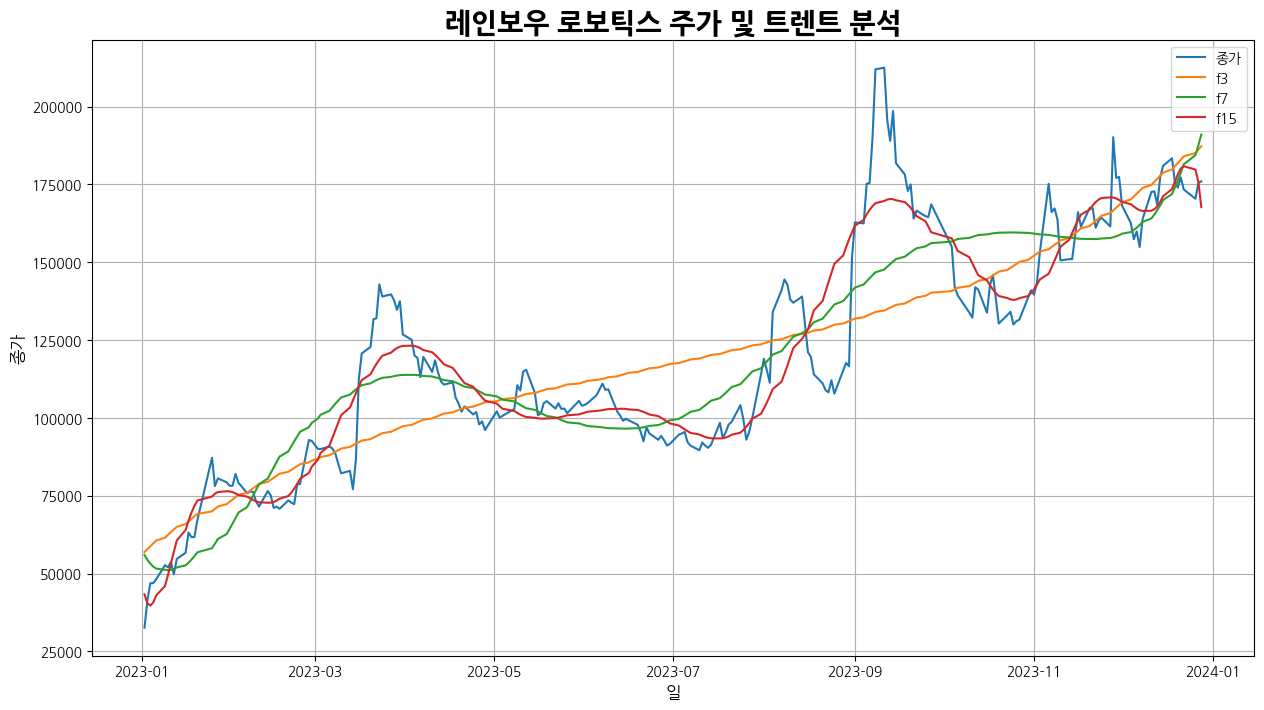

In [22]:
# 상승하는 경향에 대해서만 고려해주기로 하여 3차 다항식으로 polyfit한 데이터를 주가 데이터에서 빼주었음
time = np.arange(0, 245)
traffic = rainbow_robotics.stock["Close"]
fx = np.linspace(0, time[-1], 245)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)
f7p = np.polyfit(time, traffic, 7)
f7 = np.poly1d(f7p)
f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)


rainbow_robotics.stock.reset_index(inplace=True)
plt.figure(figsize=(15, 8))
plt.plot(rainbow_robotics.stock["Date"], rainbow_robotics.stock["Close"], label = "종가")
plt.plot(rainbow_robotics.stock["Date"], f3(fx), label = "f3")
plt.plot(rainbow_robotics.stock["Date"], f7(fx), label = "f7")
plt.plot(rainbow_robotics.stock["Date"], f15(fx), label = "f15")
plt.title("레인보우 로보틱스 주가 및 트렌트 분석", fontsize = 20, weight = "bold")
plt.xlabel("일", fontsize = 12)
plt.ylabel("종가", fontsize = 12)
plt.grid()
plt.legend()
plt.show()



In [23]:
hojae_list[2]

,score,score_cumsum
date_day,,
2023-01-03,0.572853,0.572853
2023-01-04,0.000000,0.572853
2023-01-06,0.000000,0.572853
2023-01-07,0.518417,1.091270
2023-01-08,0.000000,1.091270
...,...,...
2023-12-15,0.836025,137.460846
2023-12-18,0.573484,138.034330
2023-12-19,0.573185,138.607515


## 트렌드 제거

In [24]:
rainbow_robotics.stock["Close"] = rainbow_robotics.stock["Close"]-f3(fx)

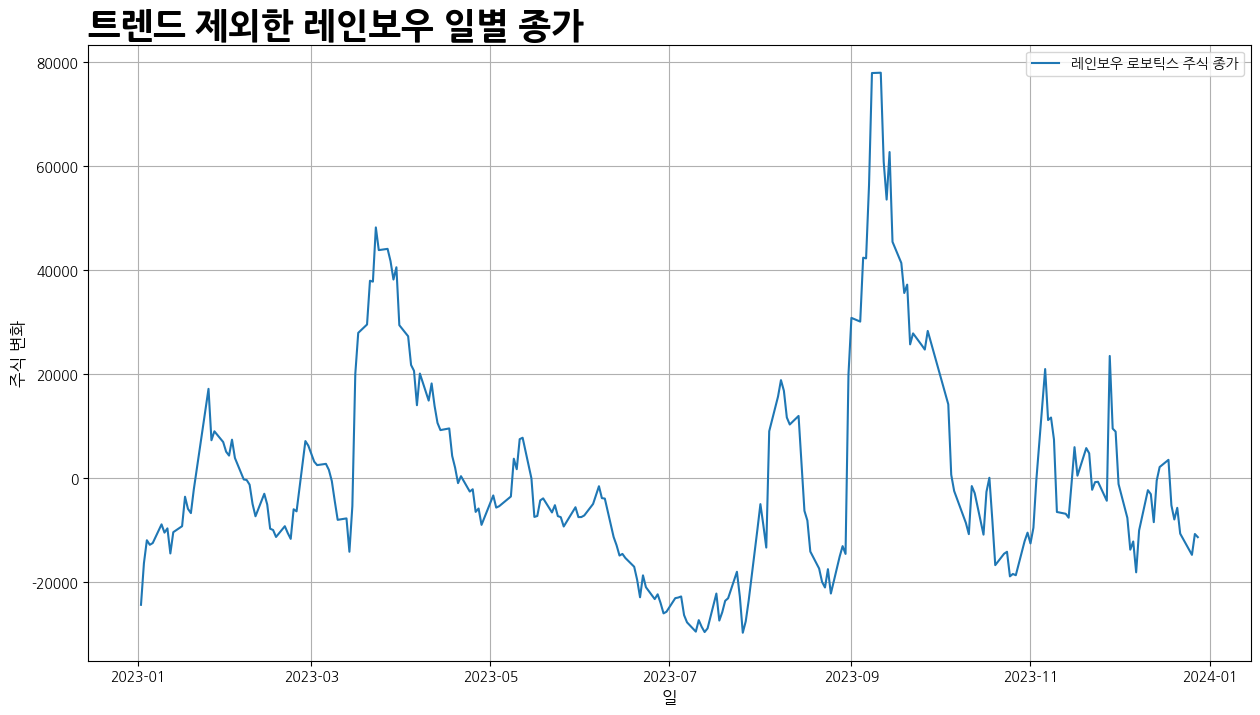

In [25]:
for i in range(len(hojae_list)):
    hojae_list[i].reset_index(inplace=True)
    hojae_list[i]["date_day"] = pd.to_datetime(hojae_list[i]["date_day"])
    hojae_list[i] = pd.concat([hojae_list[i], rainbow_robotics.stock["Close"]],axis=1, join='outer')
    hojae_list[i] = pd.concat([hojae_list[i], rainbow_robotics.stock["Volume"]],axis=1, join='outer')
    hojae_list[i].dropna(inplace = True)

plt.figure(figsize=(15, 8))
plt.plot(rainbow_robotics.stock["Date"], rainbow_robotics.stock["Close"], label = "레인보우 로보틱스 주식 종가")
plt.title("트렌드 제외한 레인보우 일별 종가", fontsize = 25, weight = "bold", loc = "left")
plt.xlabel("일", fontsize = 12)
plt.ylabel("주식 변화", fontsize = 12)
plt.legend()
plt.grid()


In [26]:
hojae_list[0]

,date_day,score,score_cumsum,Close,Volume
0,2023-01-01,-0.418525,-0.418525,-24298.552263,537307.0
1,2023-01-03,5.127981,4.709457,-16297.681737,12696270.0
2,2023-01-04,6.585341,11.294798,-11885.291808,7817245.0
3,2023-01-05,4.017885,15.312683,-12761.482964,5728586.0
4,2023-01-06,2.396755,17.709437,-12426.355691,6654312.0
...,...,...,...,...,...
240,2023-11-09,2.502095,296.827213,-5649.327049,881801.0
241,2023-11-13,-3.821217,293.005996,-10615.768390,309638.0
242,2023-11-14,0.000000,293.005996,-14694.807220,282521.0
243,2023-11-15,5.122852,298.128848,-10686.544025,357091.0


## 키워드마다 일별 호재, 악재 합산점수와 해당일 종가를 비교 회귀분석

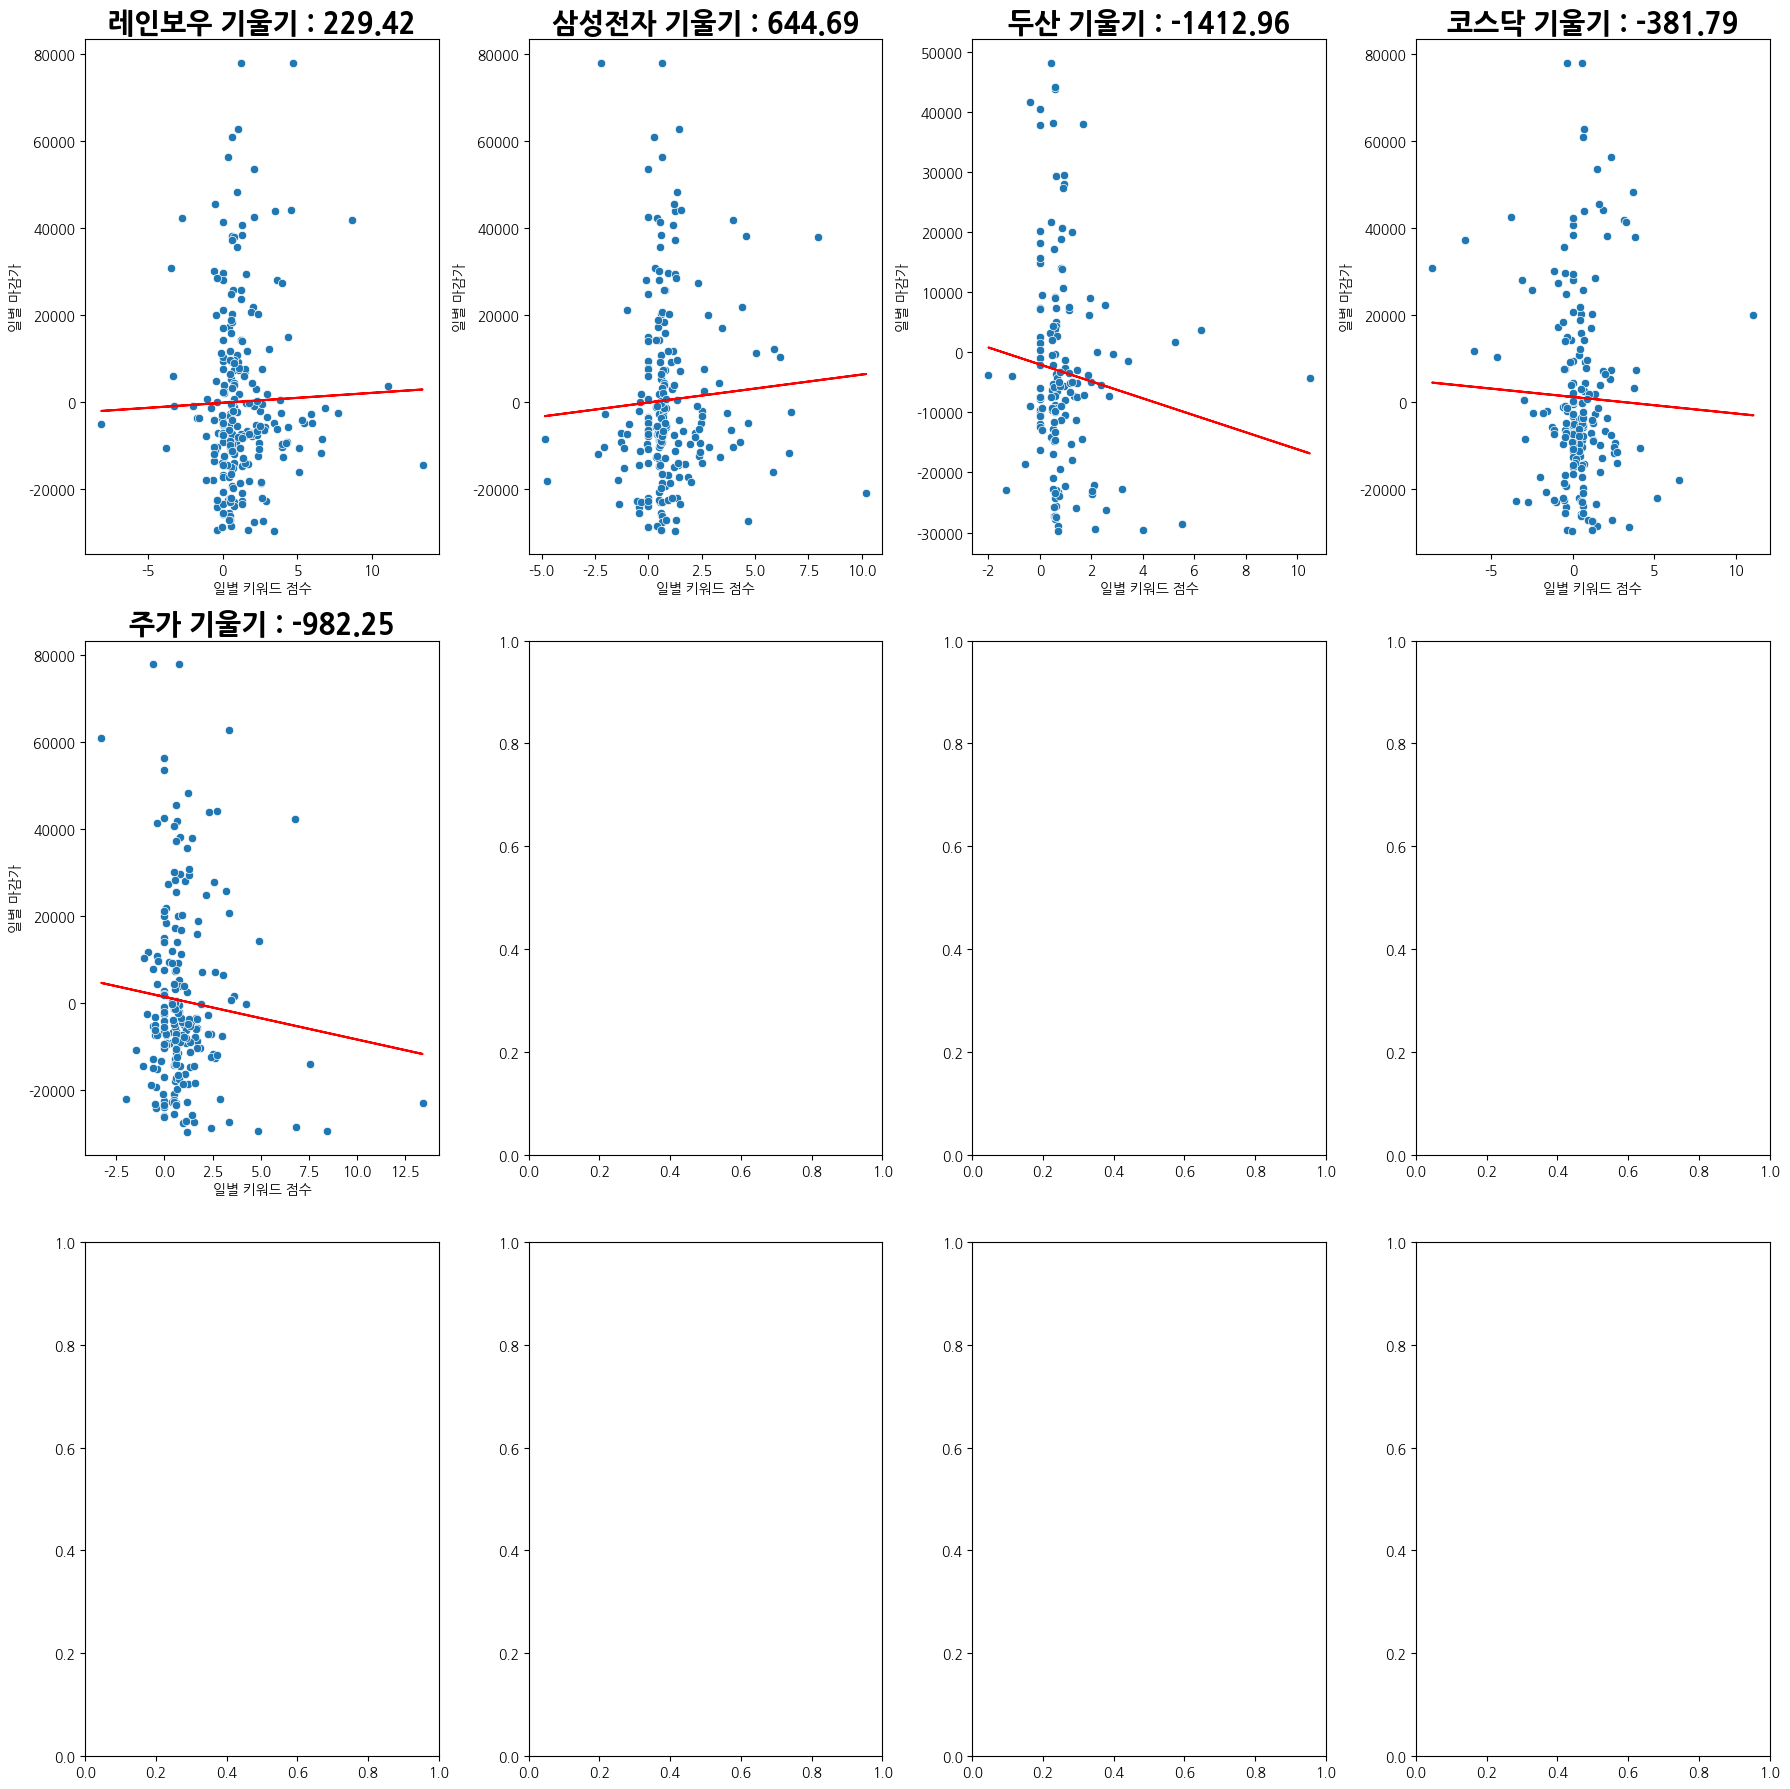

Text(0.5, 1.0, '')

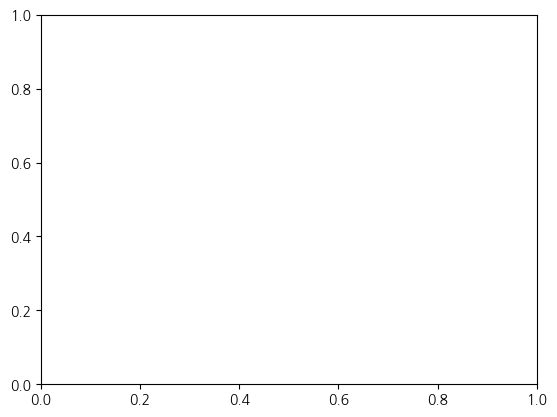

In [27]:
import numpy as np


def LR(hojae_list):
    coef_list = []
    for idx, element in enumerate(hojae_list):   
        X = np.array(element["score"])
        Y = np.array(element["Close"])
        
        # scatter 그리기
        
        plt.subplot(3, 4, idx+1)
        sns.scatterplot(x=element["score"], y=element["Close"])
        
        # m = 기울기, b = 절편
        m, b = np.polyfit(X, Y, 1)
        coef_list.append(m)
        
        # 직선 그리기 
        plt.plot(X, m*X + b, color="red")
        
        # 각 subplot에 제목 설정
        plt.title(f"{keyward_list[idx]} 기울기 : {round(m, 2)}", fontdict={"size":20, "weight":"bold"})
        
        # x, y 축 라벨 설정
        plt.xlabel("일별 키워드 점수")
        plt.ylabel("일별 마감가")
        # plt.xlim(-15, 15)

    plt.tight_layout()
    plt.show()
    
    return coef_list
    


fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 18))

# plt.suptitle("레인보우로보틱스 관련 Top 5 키워드별 상관관계", fontsize = 25, weight = "bold")
plt.subplots_adjust(left=0.1, bottom=0.1,  right=1, top=2, wspace=0.3, hspace=0.5)

coef_list = LR(hojae_list)
plt.title("")
    

In [28]:
coef_list

[229.42114692777415,
 644.6896860659641,
 -1412.9564925671684,
 -381.7877487720963,
 -982.2546396162285]

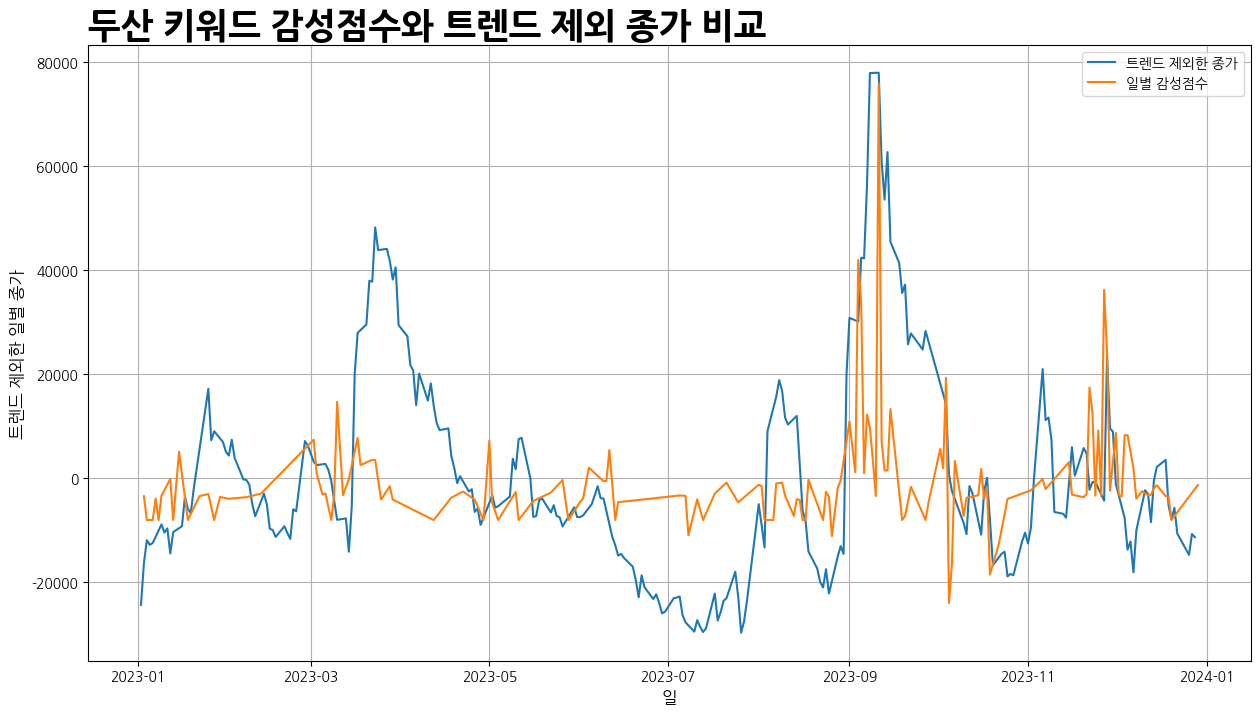

In [29]:
# 다음의 순서로 데이터가 저장되어 있음
# 레인보우, 삼성전자, 두산, 코스닥, 주가	
# 단, 각 값마다 스케일링을 다르게 해줘야한다는 단점이 있음

month_date = []
plt.figure(figsize=(15, 8))
rainbow_robotics.stock["Date"] = pd.to_datetime(rainbow_robotics.stock["Date"])

plt.plot(rainbow_robotics.stock["Date"], rainbow_robotics.stock["Close"], label = "트렌드 제외한 종가")
plt.plot(hojae_list[2]["date_day"], hojae_list[2]["score"]*8000-8000, label = "일별 감성점수")
plt.title(f"{keyward_list[2]} 키워드 감성점수와 트렌드 제외 종가 비교", fontsize = 25, weight = "bold", loc = "left")
plt.xlabel("일", fontsize = 12)
plt.ylabel("트렌드 제외한 일별 종가", fontsize = 12)
plt.legend()
plt
plt.grid()


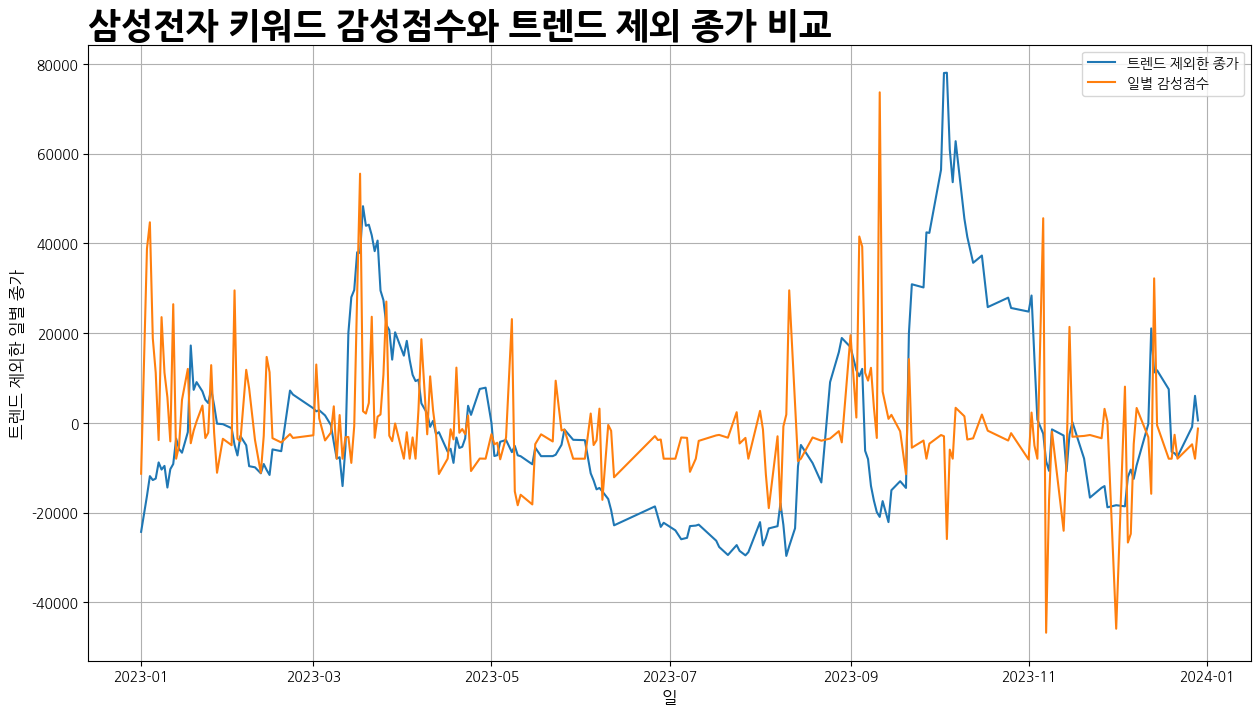

In [30]:
month_date = []
plt.figure(figsize=(15, 8))
plt.plot(hojae_list[1]["date_day"], hojae_list[1]["Close"], label = "트렌드 제외한 종가")
plt.plot(hojae_list[1]["date_day"], hojae_list[1]["score"]*8000-8000, label = "일별 감성점수")
plt.title(f"{keyward_list[1]} 키워드 감성점수와 트렌드 제외 종가 비교", fontsize = 25, weight = "bold", loc = "left")
plt.xlabel("일", fontsize = 12)
plt.ylabel("트렌드 제외한 일별 종가", fontsize = 12)
plt.legend()
plt
plt.grid()

In [31]:
topic_distinct_list[0]

,date,title,text,prediction,score,tokenized_text,tokenized_title,date_day,date_month
0,2023-01-01 07:04:01,그래도 돈 벌 주식은 있다 PB들이 꼭 찍은 유망업종은 2023 증시전망,['올해 초까지 주식시장 바닥 다지기 지속 전망 정책테마주부터 AI관련주까지 빛보는...,악재,-0.418525,"[주식, 바닥, 다지기, 지속, 정책, 테마주, AI, 업종, 게티, 이미지, 뱅크...","[주식, PB, 유망, 업종, 증시]",2023-01-01,2023-01
1,2023-01-03 07:56:40,레인보우로보틱스 삼성전자 대상 590억 규모 유상증자 결정,['서울 뉴시스 김경택 기자 레인보우로보틱스는 운영자금과 시설자금 조달을 위해 삼성...,중립,0.000000,"[뉴시스, 김경택, 레인보우, 자금, 시설, 자금, 조달, 삼성전자, 대상, 590...","[레인보우, 삼성전자, 대상, 590, 규모, 유상, 증자, 결정]",2023-01-03,2023-01
2,2023-01-03 08:22:01,레인보우로보틱스 590억 규모 제3자배정 유상증자 결정,['헤럴드경제 증권부 레인보우로보틱스는 시설자금 및 운영자금 조달을 위해 삼성전자를...,중립,0.000000,"[헤럴드, 경제, 증권, 레인보우, 시설, 자금, 자금, 조달, 삼성전자, 대상, ...","[레인보우, 590, 규모, 배정, 유상, 증자, 결정]",2023-01-03,2023-01
3,2023-01-03 08:42:01,레인보우로보틱스 삼성전자에 589억원 유상증자 결정,"['사족보행을 연구하는 연구원들의 모습.', '레인보우로보틱스 제공 레인보우로보틱스...",중립,0.000000,"[사족, 보행, 연구원, 모습, 레인보우, 레인보우, 시설, 자금, 자금, 조달, ...","[레인보우, 삼성전자, 589, 유상, 증자, 결정]",2023-01-03,2023-01
4,2023-01-03 09:08:02,특징주 레인보우로보틱스 삼성전자 대상 유상증자 결정 소식에 15 급등,['레인보우로보틱스가 삼성전자에 약 589억원 규모의 유상증자를 결정했다는 소식에 ...,중립,0.000000,"[레인보우, 스가, 삼성전자, 589, 규모, 유상, 증자, 결정, 소식, 급등세,...","[특징, 레인보우, 삼성전자, 대상, 유상, 증자, 결정, 소식, 급등]",2023-01-03,2023-01
...,...,...,...,...,...,...,...,...,...
1447,2023-12-28 09:53:57,증시 폐장일 코스피 장 초반 0 12 상승 2616 60선 개장시황,['올해 마지막 거래일인 28일 오전 서울 중구 하나은행 명동점 딜링룸에 개장 시황...,중립,0.000000,"[마지막, 거래일, 28, 오전, 중구, 은행, 명동, 딜링, 개장, 시황, 표시,...","[증시, 폐장, 코스피, 초반, 2616, 60, 개장, 시황]",2023-12-28,2023-12
1448,2023-12-28 16:27:17,유종의 미 아듀 2023 증시 올해 코스피19 코스닥 28 뛰었다 시황종합,"['코스피 1.', '6 오른 2655.', '28 코스닥 0.', '79 상승한 ...",중립,0.000000,"[코스피, 2655, 28, 코스닥, 79, 866, 57, 마감, News, 혜림...","[유종, 증시, 코스피, 19, 코스닥, 28, 시황, 종합]",2023-12-28,2023-12
1449,2023-12-29 15:52:01,올해 반도체 AI에 투자자 관심 폭발 종목은 에코프로 1위,['올해 투자자들 많이 본 보고서 10개중 7개는 반도체 투자전략 사진 게티이미지뱅...,중립,0.000000,"[투자자, 많이, 보고서, 반도체, 전략, 게티, 이미지, 뱅크, 투자자, 가장, ...","[반도체, AI, 투자자, 관심, 폭발, 에코, 프로]",2023-12-29,2023-12
1450,2023-12-29 17:57:03,AI 열풍 빅테크 ETF 올 순자산 2 4조 쑥,['국내 상장 14종 총액 7조 돌파 로봇ETF도 10배 급증 3861억 내년 금리...,호재,0.839396,"[총액, 돌파, 로봇, ETF, 급증, 3861, 금리, 인하, 성장, 열풍, 지속...","[AI, 열풍, 테크, ETF, 자산]",2023-12-29,2023-12


## 거래량 비교

In [32]:
rainbow_robotics.stock

,index,Date,Open,High,Low,Close,Volume,Change
0,0,2023-01-02,34650,34950,32000,-24298.552263,537307,-0.053701
1,1,2023-01-03,37600,42350,35700,-16297.681737,12696270,0.274540
2,2,2023-01-04,42550,47350,41550,-11885.291808,7817245,0.128761
3,3,2023-01-05,46050,50200,45650,-12761.482964,5728586,0.001066
4,4,2023-01-06,46500,53600,46450,-12426.355691,6654312,0.026624
...,...,...,...,...,...,...,...,...
240,240,2023-12-21,172000,184300,170100,-5649.327049,881801,0.018966
241,241,2023-12-22,179100,179300,172900,-10615.768390,309638,-0.021997
242,242,2023-12-26,173000,173000,167600,-14694.807220,282521,-0.017301
243,243,2023-12-27,170100,177200,168400,-10686.544025,357091,0.029930


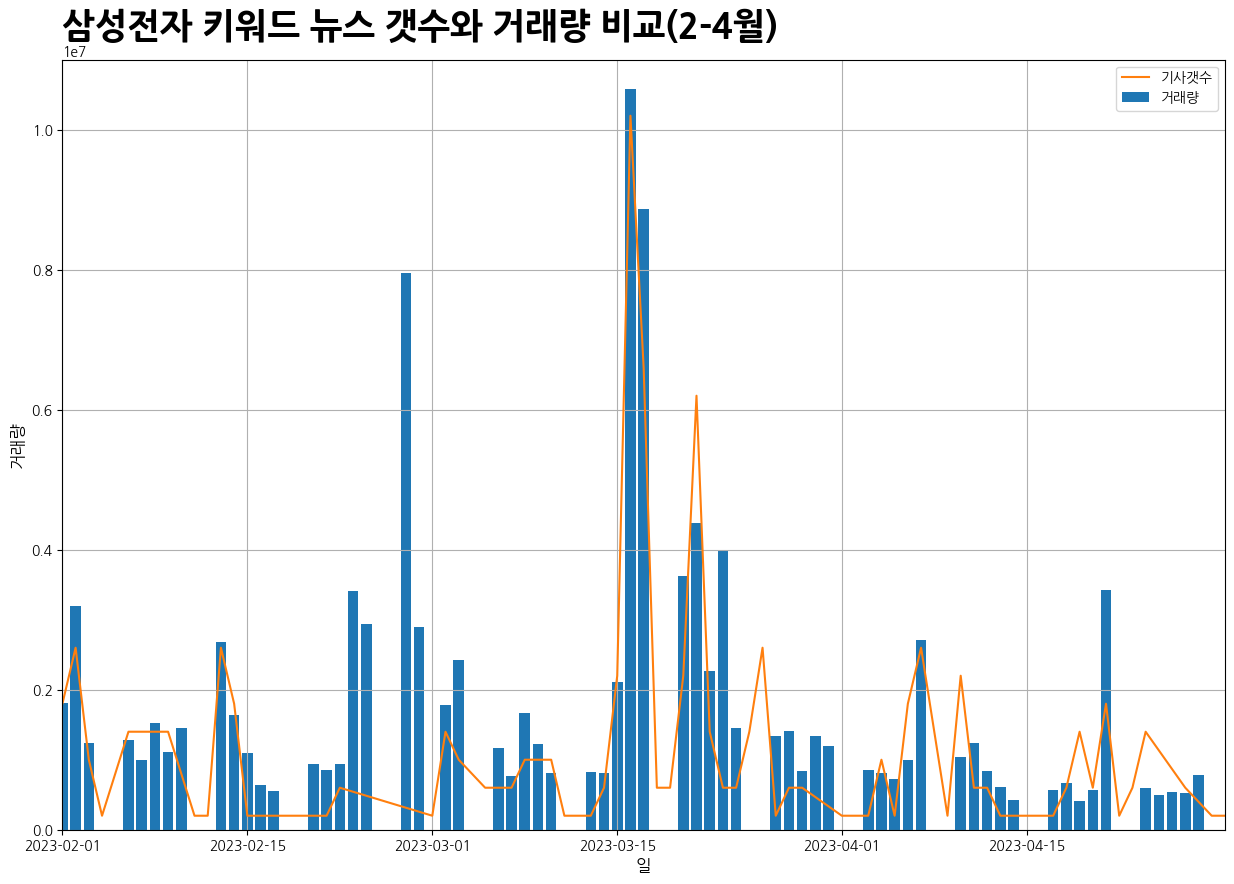

In [33]:
h = pd.pivot_table(topic_distinct_list[1], index="date_day", values = "score", aggfunc ="count")
plt.figure(figsize = (15, 10))
rainbow_robotics.stock["Date"] = pd.to_datetime(rainbow_robotics.stock["Date"])

plt.bar(rainbow_robotics.stock["Date"], rainbow_robotics.stock["Volume"], label = "거래량")
plt.plot(h.index,h["score"]*400000-200000, label = "기사갯수",  color = "tab:orange")




plt.ylabel("Volume")
plt.legend()
start = pd.to_datetime("2023-02-01")
end = pd.to_datetime("2023-04-30")
plt.xlim(start, end)
plt.ylim(0, 11000000)
plt.title(f"{keyward_list[1]} 키워드 뉴스 갯수와 거래량 비교(2-4월)", fontsize = 25, weight = "bold", loc = "left")

plt.xlabel("일", fontsize = 12)
plt.ylabel("거래량", fontsize = 12)

plt.grid()
plt.show()